In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\samsung\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\samsung\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\samsung\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### 200차원 KMEANS

In [131]:
data = pd.read_csv("final_data")
data_size = len(data)
label = data['label']
print(data)
print(label)
data[data['label'] == '울음']

          file_name label
0        file_1.jpg    소외
1        file_2.jpg  다이어트
2        file_3.jpg    실패
3        file_4.jpg    긍정
4        file_5.jpg    피자
...             ...   ...
2452  file_2496.jpg   첫사랑
2453  file_2497.jpg    격분
2454  file_2498.jpg    추방
2455  file_2499.jpg    친구
2456  file_2500.jpg    포기

[2457 rows x 2 columns]
0         소외
1       다이어트
2         실패
3         긍정
4         피자
        ... 
2452     첫사랑
2453      격분
2454      추방
2455      친구
2456      포기
Name: label, Length: 2457, dtype: object


,file_name,label
60,file_61.jpg,울음
2301,file_2344.jpg,울음


In [133]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import gensim
import numpy as np

# Load a pre-trained Word2Vec model (replace 'path/to/your/model' with the actual path)
model = gensim.models.Word2Vec.load('ko.bin')
print(model.wv.vectors.shape)  # 모델 내 단어 갯수는 30185개

# List of words to be labeled
word_list = label

# Create a dictionary to store word vectors
word_vectors = {}
NaN = []

# Populate the dictionary with word vectors
for word in word_list:
    try:
        new_word = word.strip(" ")
        word_vectors[new_word] = model[new_word]
    except KeyError:
        # Handle the case where the word is not in the vocabulary
        print(f"Word '{new_word}' not in vocabulary.")
        NaN.append(word)
word_vectors
word_df = pd.DataFrame(word_vectors)
word_df

(30185, 200)
Word '정색' not in vocabulary.
Word '놀람' not in vocabulary.
Word '신남' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '창피' not in vocabulary.
Word '용돈' not in vocabulary.
Word '흥정' not in vocabulary.
Word '반가움' not in vocabulary.
Word '황당' not in vocabulary.
Word '염탐' not in vocabulary.
Word '좋음' not in vocabulary.
Word '눈빛' not in vocabulary.
Word '시큼' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '민망' not in vocabulary.
Word '시무룩' not in vocabulary.
Word '수줍음' not in vocabulary.
Word '황당' not in vocabulary.
Word '놀람' not in vocabulary.
Word '식탐' not in vocabulary.
Word '광분' not in vocabulary.
Word '황당' not in vocabulary.
Word '까칠' not in vocabulary.
Word '황당' not in vocabulary.
Word '모른척' not in vocabulary.
Word '소리침' not in vocabulary.
Word '소분노' not in vocabulary.
Word '삐침' not in vocabulary.
Word '말대꾸' not in vocabulary.
Word '더러움' not in vocabulary.
Word '더러움' not in vocabulary.
Word '허기' not in vocabulary.
Word '삐침' not in v

C:\Users\samsung\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(
C:\Users\samsung\AppData\Local\Temp\ipykernel_11792\736513206.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors[new_word] = model[new_word]


,소외,다이어트,실패,긍정,피자,식사,거절,후회,불만,의문,...,배제,기운,쌈,중퇴,기권,불운,택시,악수,단합,첫사랑
0,-0.483972,0.350489,-2.855057,0.604088,-0.249783,-0.078015,-1.639856,-0.566500,-0.483653,-0.930253,...,-1.141052,-0.488868,0.582259,-0.389181,0.488638,-0.353876,-0.777993,0.116270,0.105651,-0.408059
1,0.729992,-0.073935,-2.316781,0.042427,-0.138864,-0.141852,0.313289,-0.149665,-1.457357,1.285335,...,0.325202,-0.558134,-0.292869,0.465061,0.148463,0.012763,0.556049,-0.102036,-0.329373,-0.361370
2,0.905891,0.783086,-2.049907,0.334306,0.487499,0.076565,-0.617230,0.485574,-0.022496,-0.213127,...,-1.836984,1.118696,0.163051,0.201750,-0.174053,0.118373,-0.493491,-0.266882,0.166661,0.390251
3,-1.352918,-0.253822,-0.172188,-0.550515,0.655443,-1.799743,-2.516470,-1.070929,-0.841431,0.990372,...,-2.533406,-0.477913,0.355790,-0.749999,-0.797655,-0.010570,-0.504610,-0.914001,-0.552056,-0.043357
4,-0.534489,-0.219407,0.991559,0.180508,0.213461,0.059684,1.357738,-0.697496,1.265670,0.682610,...,0.919822,-0.173301,0.007159,-0.760697,0.299453,0.155991,-1.098105,0.251541,0.204312,-0.242011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.091903,0.594744,-0.574114,-0.301485,0.243577,2.005394,-1.615624,0.163686,-0.002320,-0.135782,...,-0.811525,-0.027841,0.325878,0.576907,-0.371526,0.070761,0.199327,0.029952,-0.096820,-0.203547
196,1.107072,0.479835,0.598401,0.100404,0.236785,0.298742,-0.093244,0.073304,0.763229,2.288591,...,0.363493,0.921475,-0.225511,1.117324,-0.402078,0.440481,-0.156720,-0.168130,0.110475,-0.131888
197,0.488668,0.401557,0.870932,0.431045,0.092349,2.047430,1.049325,-0.054836,0.497921,2.000011,...,0.555157,0.397747,0.016883,-0.528362,0.696320,0.125680,0.370761,0.010330,-0.131035,-0.071702
198,2.433382,0.255171,-0.324395,-0.043831,0.956416,2.501294,-0.833250,-0.129242,-0.830422,-1.351598,...,2.195479,-0.276788,0.300567,0.546496,-1.529978,0.127028,0.291381,0.205894,0.577021,-0.107796


In [128]:
model.most_similar('즐거움'
    )

C:\Users\samsung\AppData\Local\Temp\ipykernel_11792\1669424418.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('즐거움'


[('기쁨', 0.7912124395370483),
 ('괴로움', 0.6675163507461548),
 ('매력', 0.6643722057342529),
 ('웃음', 0.6643539667129517),
 ('아름다움', 0.6521420478820801),
 ('행운', 0.6483654975891113),
 ('행복', 0.6396492719650269),
 ('쾌락', 0.635045051574707),
 ('인생', 0.6350153684616089),
 ('욕망', 0.6348717212677002)]

In [134]:
print(NaN)
print(len(NaN))
print(list(set(NaN)))

['정색', '놀람', '신남', '흥겨움', '흥겨움', '창피', '용돈', '흥정', '반가움', '황당', '염탐', '좋음', '눈빛', '시큼', '흥겨움', '민망', '시무룩', '수줍음', '황당', '놀람', '식탐', '광분', '황당', '까칠', '황당', '모른척', '소리침', '소분노', '삐침', '말대꾸', '더러움', '더러움', '허기', '삐침', '놀람', '지루함', '소름', '놀람', '윽박', '놀람', '놀람', '황당', '윽박', '황당', '어두움', '황당', '허기', '윽박', '윽박', '미안함', '어두움', '놀람', '놀람', '삐침', '어두움', '헛소리', '애교', '귀여움', '허기', '허기', '허기', '윽박', '귀여움', '귀여움', '부적절', '허기', '귀여움', '놀람', '솔직함', '부적절', '헛소리', '부적절', '허기', '허기', '더러움', '더러움', '윽박', '놀람', '짬', '부적절', '부적절', '부적절', '부적절', '부적절', '부적절', '부적절', '미룸', '부적절', '부적절', '부적절', '헛소리', '까불', '부적절', '망설임', '모름', '의아심', '낭패', '허기', '까불', '인셍', '고요함']
101
['신남', '광분', '부적절', '소름', '헛소리', '미룸', '황당', '소분노', '윽박', '까칠', '흥정', '지루함', '애교', '용돈', '고요함', '정색', '삐침', '더러움', '말대꾸', '어두움', '식탐', '허기', '놀람', '눈빛', '미안함', '귀여움', '시무룩', '민망', '염탐', '창피', '좋음', '소리침', '시큼', '반가움', '솔직함', '모른척', '짬', '모름', '망설임', '흥겨움', '까불', '수줍음', '낭패', '인셍', '의아심']


In [158]:
word_transpose = word_df.transpose()
word_transpose

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
소외,-0.483972,0.729992,0.905891,-1.352918,-0.534489,-0.246235,-1.429191,0.520611,-0.383976,1.008037,...,0.241350,0.174665,-0.411606,-0.288752,-0.160790,-0.091903,1.107072,0.488668,2.433382,-0.037658
다이어트,0.350489,-0.073935,0.783086,-0.253822,-0.219407,-0.172415,-0.279633,0.704964,0.238278,-0.160904,...,-0.373632,0.288896,0.012419,0.077824,0.273780,0.594744,0.479835,0.401557,0.255171,0.174620
실패,-2.855057,-2.316781,-2.049907,-0.172188,0.991559,-2.094825,-0.073328,1.960894,0.012275,0.211430,...,0.566378,0.337536,-0.024208,-1.114787,-1.478428,-0.574114,0.598401,0.870932,-0.324395,-0.643110
긍정,0.604088,0.042427,0.334306,-0.550515,0.180508,-0.333037,-0.117227,-0.265808,-0.576902,0.435154,...,-0.168106,-0.802308,0.358216,-0.951309,0.196382,-0.301485,0.100404,0.431045,-0.043831,-0.521822
피자,-0.249783,-0.138864,0.487499,0.655443,0.213461,-0.402867,1.817255,0.645031,0.397606,-0.521637,...,-1.396192,0.220774,1.046692,0.155005,-0.372727,0.243577,0.236785,0.092349,0.956416,0.177844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
불운,-0.353876,0.012763,0.118373,-0.010570,0.155991,-0.082212,0.078788,0.054140,-0.047410,0.065181,...,0.144083,0.067802,-0.042004,-0.443382,0.340053,0.070761,0.440481,0.125680,0.127028,-0.425117
택시,-0.777993,0.556049,-0.493491,-0.504610,-1.098105,0.500979,0.562056,0.092105,-0.062316,-2.232370,...,-0.432319,-0.114310,-0.982485,0.894460,-0.367178,0.199327,-0.156720,0.370761,0.291381,-1.192952
악수,0.116270,-0.102036,-0.266882,-0.914001,0.251541,-0.021427,-0.038164,0.395506,0.410472,-0.115092,...,0.377181,0.335755,0.205232,0.194565,0.133880,0.029952,-0.168130,0.010330,0.205894,-0.109291
단합,0.105651,-0.329373,0.166661,-0.552056,0.204312,-0.228424,0.084427,0.284063,0.074972,0.052501,...,-0.087844,-0.352375,0.041892,-0.088083,-0.372224,-0.096820,0.110475,-0.131035,0.577021,0.070180


In [136]:
word_transpose.values

array([[-0.4839724 ,  0.7299921 ,  0.9058906 , ...,  0.48866838,
         2.4333818 , -0.03765844],
       [ 0.35048863, -0.07393498,  0.7830855 , ...,  0.40155673,
         0.25517148,  0.17461987],
       [-2.8550575 , -2.3167806 , -2.0499072 , ...,  0.87093157,
        -0.32439458, -0.6431102 ],
       ...,
       [ 0.11627022, -0.10203622, -0.2668817 , ...,  0.01032973,
         0.20589359, -0.10929111],
       [ 0.10565133, -0.32937258,  0.1666606 , ..., -0.13103521,
         0.57702136,  0.07017987],
       [-0.40805927, -0.36136967,  0.39025137, ..., -0.07170218,
        -0.10779624, -0.06297515]], dtype=float32)

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

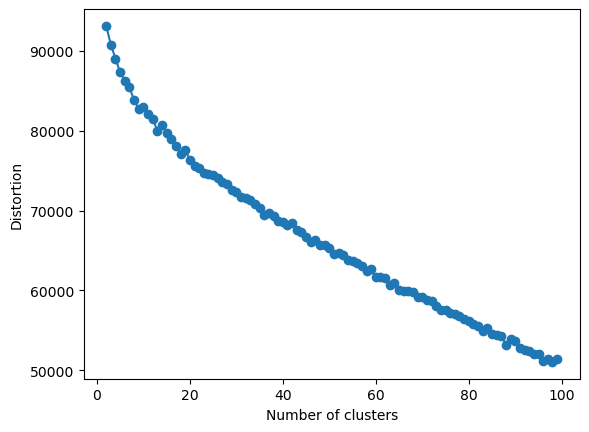

In [138]:
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산

distortions = []

for i in range(2, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(word_transpose)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(2, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

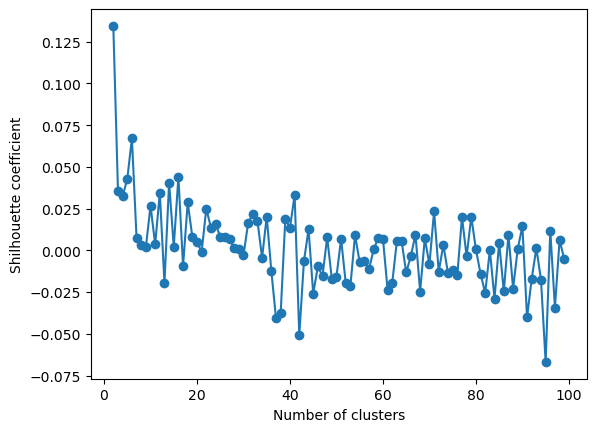

In [145]:
silhouette = []

for i in range(2,100):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(word_transpose) # 모형 훈련
    silhouette_values = silhouette_score(word_transpose, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,100), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [139]:
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


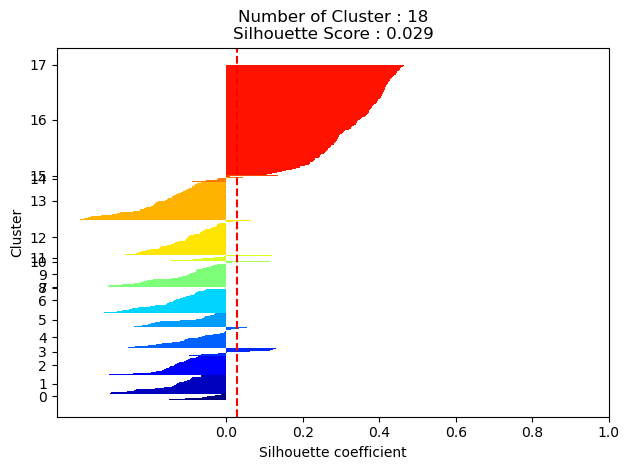

In [149]:
silhouetteViz(18, word_transpose)


In [160]:
kmeans = KMeans(n_clusters=18, random_state=42)
res = word_transpose.copy()
res['Cluster'] = kmeans.fit_predict(word_transpose)
res

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Cluster
소외,-0.483972,0.729992,0.905891,-1.352918,-0.534489,-0.246235,-1.429191,0.520611,-0.383976,1.008037,...,0.174665,-0.411606,-0.288752,-0.160790,-0.091903,1.107072,0.488668,2.433382,-0.037658,1
다이어트,0.350489,-0.073935,0.783086,-0.253822,-0.219407,-0.172415,-0.279633,0.704964,0.238278,-0.160904,...,0.288896,0.012419,0.077824,0.273780,0.594744,0.479835,0.401557,0.255171,0.174620,11
실패,-2.855057,-2.316781,-2.049907,-0.172188,0.991559,-2.094825,-0.073328,1.960894,0.012275,0.211430,...,0.337536,-0.024208,-1.114787,-1.478428,-0.574114,0.598401,0.870932,-0.324395,-0.643110,16
긍정,0.604088,0.042427,0.334306,-0.550515,0.180508,-0.333037,-0.117227,-0.265808,-0.576902,0.435154,...,-0.802308,0.358216,-0.951309,0.196382,-0.301485,0.100404,0.431045,-0.043831,-0.521822,11
피자,-0.249783,-0.138864,0.487499,0.655443,0.213461,-0.402867,1.817255,0.645031,0.397606,-0.521637,...,0.220774,1.046692,0.155005,-0.372727,0.243577,0.236785,0.092349,0.956416,0.177844,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
불운,-0.353876,0.012763,0.118373,-0.010570,0.155991,-0.082212,0.078788,0.054140,-0.047410,0.065181,...,0.067802,-0.042004,-0.443382,0.340053,0.070761,0.440481,0.125680,0.127028,-0.425117,11
택시,-0.777993,0.556049,-0.493491,-0.504610,-1.098105,0.500979,0.562056,0.092105,-0.062316,-2.232370,...,-0.114310,-0.982485,0.894460,-0.367178,0.199327,-0.156720,0.370761,0.291381,-1.192952,6
악수,0.116270,-0.102036,-0.266882,-0.914001,0.251541,-0.021427,-0.038164,0.395506,0.410472,-0.115092,...,0.335755,0.205232,0.194565,0.133880,0.029952,-0.168130,0.010330,0.205894,-0.109291,11
단합,0.105651,-0.329373,0.166661,-0.552056,0.204312,-0.228424,0.084427,0.284063,0.074972,0.052501,...,-0.352375,0.041892,-0.088083,-0.372224,-0.096820,0.110475,-0.131035,0.577021,0.070180,11


In [161]:
word_transpose[word_transpose['Cluster'] ==14]

KeyError: 'Cluster'

In [162]:
word_transpose.index

Index(['소외', '다이어트', '실패', '긍정', '피자', '식사', '거절', '후회', '불만', '의문',
       ...
       '배제', '기운', '쌈', '중퇴', '기권', '불운', '택시', '악수', '단합', '첫사랑'],
      dtype='object', length=627)

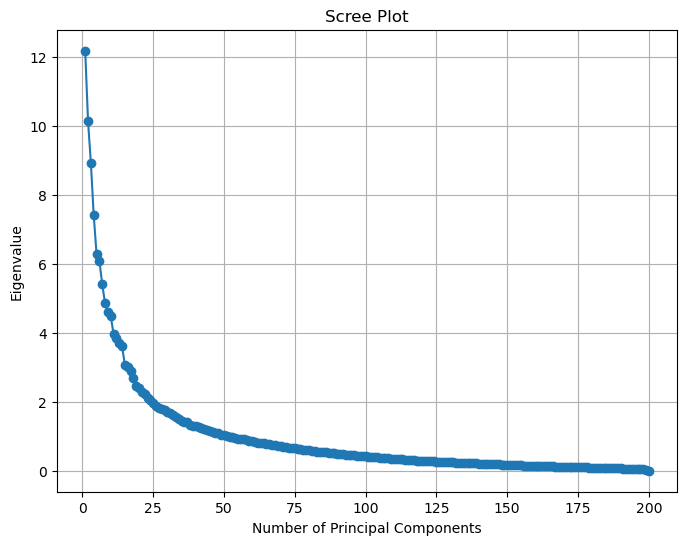

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load a sample dataset (replace this with your own data)

# Standardize the features (optional but recommended for PCA)
X_standardized = (word_transpose - np.mean(word_transpose, axis=0)) / np.std(word_transpose, axis=0)

# Fit PCA and obtain the eigenvalues
pca = PCA()
pca.fit(X_standardized)
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [164]:
import numpy as np
from sklearn.decomposition import PCA

# Standardize the features (optional but recommended for PCA)
data_standardized = (word_transpose - np.mean(word_transpose, axis=0)) / np.std(word_transpose, axis=0)

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA and obtain the eigenvalues
pca.fit(data_standardized)
eigenvalues = pca.explained_variance_

# Applying Kaiser's Rule to determine the number of components to retain
num_components_to_retain = np.sum(eigenvalues > 1)

# Initialize PCA with the determined number of components
pca_kaiser = PCA(n_components=num_components_to_retain)

# Fit PCA with the selected number of components
data_reduced_kaiser = pca_kaiser.fit_transform(data_standardized)

# The variable data_reduced_kaiser now contains the data with the selected number of components

# Print the number of components retained according to Kaiser's Rule
print(f"Number of components retained using Kaiser's Rule: {num_components_to_retain}")


Number of components retained using Kaiser's Rule: 51


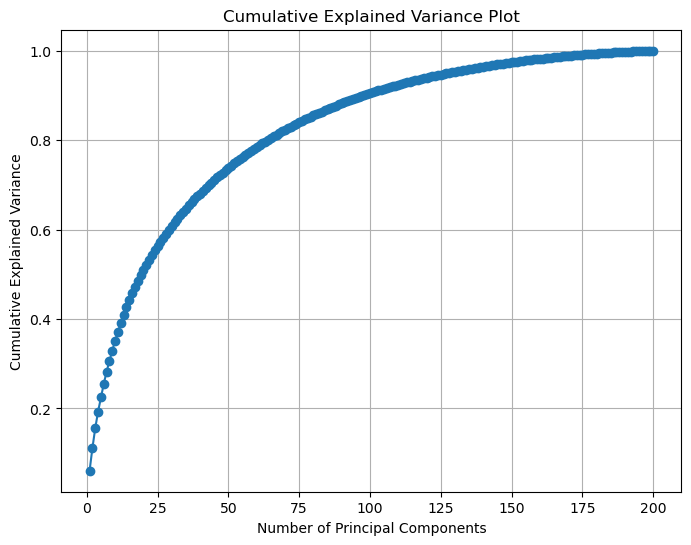

Cumulative Explained Variance:
[0.06086338 0.11147731 0.15611756 0.19316037 0.224606   0.255041
 0.2821015  0.3063923  0.32942706 0.35190058 0.37173608 0.3910301
 0.4096166  0.42763653 0.4430348  0.45805734 0.47252646 0.48591977
 0.4982736  0.5102536  0.5216802  0.532795   0.5433516  0.55355346
 0.56335616 0.5727046  0.5817481  0.590686   0.5995283  0.6080716
 0.61643744 0.6244754  0.6322151  0.6397078  0.6468941  0.65397954
 0.66098434 0.6676428  0.6741644  0.6806014  0.6869067  0.693073
 0.6991963  0.7051323  0.71093714 0.71653324 0.7220367  0.7275098
 0.7327339  0.7378991  0.74296606 0.747931   0.7528551  0.7576064
 0.762246   0.7668526  0.77141637 0.77582896 0.7801471  0.7843991
 0.7885794  0.7926834  0.7967156  0.80069095 0.8046246  0.8085113
 0.8122947  0.81602967 0.81968635 0.82331413 0.82680804 0.8302304
 0.8335669  0.83686537 0.8401407  0.84334975 0.84647703 0.8495694
 0.8525709  0.8555324  0.85842437 0.86126596 0.86406684 0.86678475
 0.8694635  0.8721262  0.8747412  0.8773293

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


# Standardize the features (optional but recommended for PCA)
X_standardized = (word_transpose - np.mean(word_transpose, axis=0)) / np.std(word_transpose, axis=0)

# Fit PCA and obtain the explained variance
pca = PCA()
pca.fit(X_standardized)
explained_variance = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print the cumulative explained variance
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

In [166]:
import numpy as np
from sklearn.decomposition import PCA

# Number of desired dimensions after PCA
n_components = 51

# Standardize the features (optional but recommended for PCA)
data_standardized = (word_transpose - np.mean(word_transpose, axis=0)) / np.std(word_transpose, axis=0)

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA and transform the data
data_reduced = pca.fit_transform(data_standardized)

# The variable data_reduced now contains the data in 24 dimensions

# Print the explained variance ratio for each selected component
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)

# Optionally, if you want to access the principal components themselves
principal_components = pca.components_

# You can also access the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio for each component:
[0.06086348 0.05061395 0.04464028 0.03704282 0.03144561 0.03043505
 0.02706054 0.02429083 0.02303475 0.02247348 0.0198355  0.01929403
 0.01858646 0.01801994 0.01539807 0.01502228 0.01446881 0.01339259
 0.0123531  0.01197862 0.01142601 0.01111423 0.01055478 0.01019981
 0.00980175 0.0093457  0.00904047 0.00893507 0.00882629 0.00853675
 0.00834823 0.00803425 0.00772014 0.00748648 0.00716065 0.00706767
 0.00699358 0.00662803 0.00650924 0.00638588 0.00628671 0.00611016
 0.00604866 0.00584159 0.00572689 0.0054898  0.0054237  0.00537875
 0.00510167 0.00499132 0.00495999]

Cumulative Explained Variance:
[0.06086348 0.11147743 0.15611771 0.19316053 0.22460614 0.25504118
 0.28210172 0.30639255 0.3294273  0.3519008  0.3717363  0.3910303
 0.40961677 0.4276367  0.4430348  0.45805708 0.4725259  0.4859185
 0.49827158 0.5102502  0.52167624 0.5327905  0.5433453  0.55354506
 0.5633468  0.5726925  0.581733   0.5906681  0.5994944  0.60803115
 0.6163794  0.62441

In [167]:
data_reduced

array([[ 3.6291347e+00, -9.6959400e-01, -1.0074893e+00, ...,
         2.7750799e-01,  1.7082067e-02, -9.4772041e-02],
       [-1.9650238e+00, -2.3327310e+00, -7.5161290e-01, ...,
         2.6500675e-01, -5.6740355e-02,  6.2345338e-01],
       [ 6.5201163e+00,  4.5406634e-01,  6.8336463e+00, ...,
         7.0618224e-01,  1.4093007e+00,  1.4107202e-01],
       ...,
       [-1.8349347e+00, -1.3467642e+00,  1.3562984e+00, ...,
        -1.0659538e-01, -4.6681307e-02, -7.4244820e-02],
       [-2.3951928e-01, -2.1773589e+00,  2.3153481e-01, ...,
        -1.5319377e-01,  2.5645578e-02,  1.6497900e-03],
       [-2.6165338e+00, -3.5847330e-01,  3.4936914e-01, ...,
        -2.9450393e-01, -5.1625466e-01,  2.4438081e-02]], dtype=float32)

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

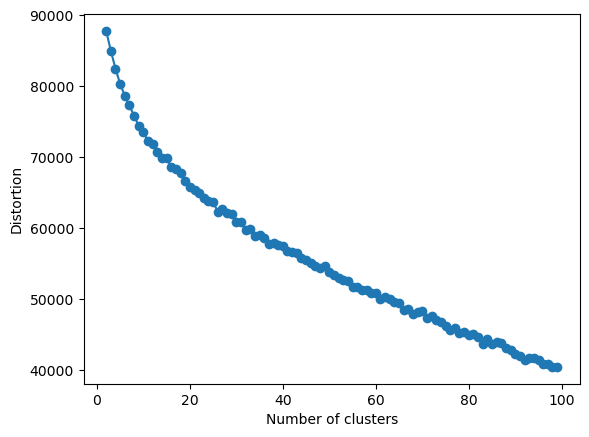

In [168]:
distortions = []

for i in range(2, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(data_reduced)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(2, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

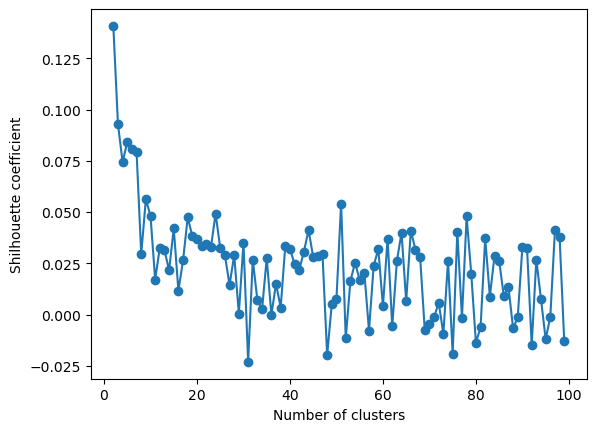

In [169]:
silhouette = []

for i in range(2,100):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(data_reduced) # 모형 훈련
    silhouette_values = silhouette_score(data_reduced, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,100), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


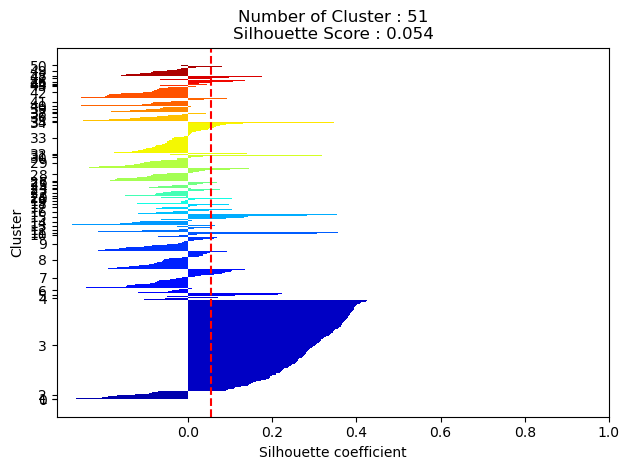

In [171]:
silhouetteViz(51, data_reduced)


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


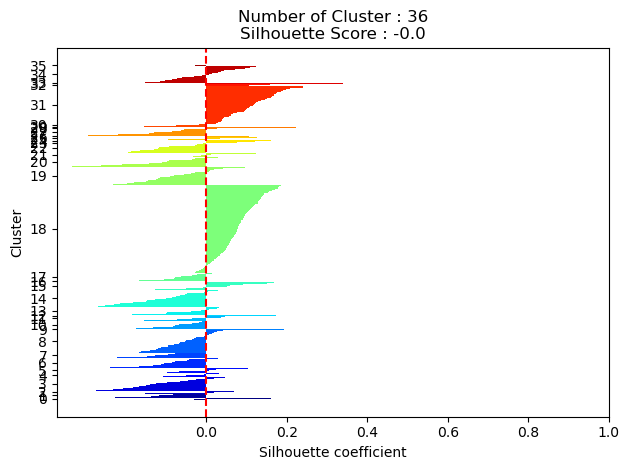

In [200]:
silhouetteViz(36, data_reduced)


In [172]:
kmeans = KMeans(n_clusters=51, random_state=42)
res2 = pd.DataFrame(data_reduced)
model = kmeans.fit_predict(data_reduced)
res2["Cluster"] = model
res2

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,Cluster
0,3.629135,-0.969594,-1.007489,-0.794067,2.456097,2.714952,1.356868,-2.678375,-1.860144,3.626828,...,-1.943833,-1.917980,0.551118,-0.085855,1.682657,-1.197219,0.277508,0.017082,-0.094772,40
1,-1.965024,-2.332731,-0.751613,0.126961,-0.212294,-0.082532,-0.219996,0.162329,-0.753556,0.216041,...,-0.250592,-0.636451,0.136806,0.415295,0.011764,-0.046620,0.265007,-0.056740,0.623453,1
2,6.520116,0.454066,6.833646,3.926507,6.274397,2.691955,-0.255403,2.754203,-0.117781,-5.696780,...,-0.664206,-2.007357,0.341780,1.347973,0.371143,-0.298774,0.706182,1.409301,0.141072,35
3,1.949224,-0.262461,-1.360313,-0.050292,-1.063889,0.219809,-3.004304,-3.017175,0.927276,-0.507692,...,-0.177964,0.600505,0.420427,0.711394,-0.073050,0.383808,0.314777,-0.459536,-0.689777,40
4,-5.825596,-3.119511,0.204195,0.173625,-1.015439,-1.190260,1.355257,-0.625570,-2.897907,0.008671,...,1.311426,-1.342793,0.039469,1.012657,0.171443,-0.749842,0.326718,-1.060281,-0.023893,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,-0.914630,0.281103,-0.301915,-0.182809,1.396233,0.545228,-1.366171,0.613188,0.825697,0.666750,...,-0.190747,-0.370619,0.349644,0.281372,0.103400,-0.492584,-0.056863,-0.106637,0.144263,31
623,-2.494962,-4.288956,1.041665,-1.311114,-0.274872,-1.963842,1.535570,2.112738,-1.212300,1.715955,...,0.448717,-0.759201,-2.269154,1.495764,0.421889,0.204523,0.527464,0.429307,1.060909,20
624,-1.834935,-1.346764,1.356298,-0.987609,-0.450275,0.224771,-0.363374,-0.435534,-0.022800,-1.129892,...,-0.054189,0.513724,-0.138609,-0.266305,0.242730,-0.221022,-0.106595,-0.046681,-0.074245,1
625,-0.239519,-2.177359,0.231535,-0.896115,0.586946,1.866635,-0.714400,-1.175776,0.252418,-0.411497,...,0.720752,0.271295,-0.225498,-0.469058,-0.456254,-0.345607,-0.153194,0.025646,0.001650,40


In [173]:
res2.index = word_transpose.index

In [189]:
res2[res2['Cluster'] == 17]


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,Cluster
수치,0.707378,-2.171242,-5.195053,2.745222,0.032078,-3.610766,0.040544,0.740590,1.546947,-2.035370,...,-1.643529,0.175100,0.605924,1.971394,-0.301734,-0.147532,0.520561,0.851405,0.116533,17
숫자,-1.536289,-2.684921,-3.679838,1.998883,-2.757619,-5.576481,4.077526,-0.345460,2.247236,-5.760996,...,0.481526,-0.846765,-0.095590,-0.304216,-0.126168,-2.071809,-1.719849,-0.421957,-0.931005,17
시간,-0.576808,-2.664735,-6.314844,2.506110,0.028310,-2.100934,5.973746,9.449961,5.647660,-3.346728,...,-1.880267,3.053354,2.139094,0.678757,-2.228145,-0.003543,0.695276,1.980214,-1.173470,17
한계,5.358092,-2.155519,-7.786815,1.629161,2.275796,-1.771840,-1.729741,-0.709880,-0.221981,-5.184966,...,-1.060733,-1.099255,2.251323,1.559499,-0.873282,-1.023334,2.843638,0.472548,-3.068583,17
성질,3.420381,2.160927,-10.120153,3.519745,-0.929594,-6.320806,0.151767,-2.647198,3.177393,-2.353777,...,1.293531,-1.438528,0.176876,0.772396,-0.065089,1.774466,1.053476,1.878731,-2.139925,17
정도,0.166875,-1.352577,-6.483932,2.552165,0.521381,-4.918509,1.571258,3.215806,1.035025,-2.501723,...,-1.081883,3.592613,2.785570,-2.600111,-1.782920,2.731693,-3.214183,-3.944371,-1.054009,17
비교,3.837404,-4.899591,-3.479118,10.822868,-4.435712,1.833796,2.992527,-3.521695,-0.917466,0.111477,...,-1.860072,1.587494,-1.727512,-0.533228,0.822786,0.094303,-3.083983,-2.510111,0.045495,17


In [201]:
import numpy as np
from sklearn.decomposition import PCA

# Number of desired dimensions after PCA
n_components = 3

# Standardize the features (optional but recommended for PCA)
data_standardized = (word_transpose - np.mean(word_transpose, axis=0)) / np.std(word_transpose, axis=0)

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA and transform the data
data_reduced = pca.fit_transform(data_standardized)

# The variable data_reduced now contains the data in 24 dimensions

# Print the explained variance ratio for each selected component
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)

# Optionally, if you want to access the principal components themselves
principal_components = pca.components_

# You can also access the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio for each component:
[0.06086341 0.05061392 0.04464021]

Cumulative Explained Variance:
[0.06086341 0.11147732 0.15611753]


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

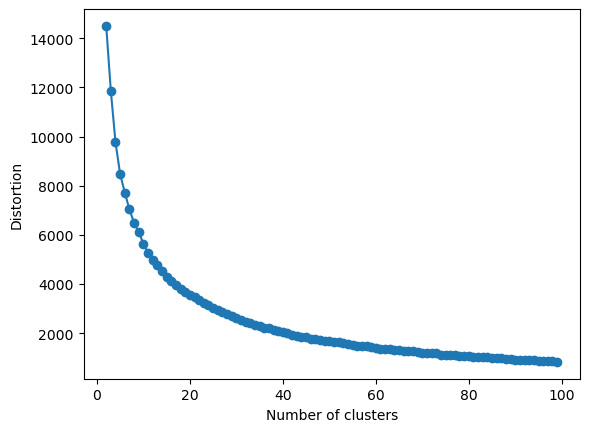

In [202]:
distortions = []

for i in range(2, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(data_reduced)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(2, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

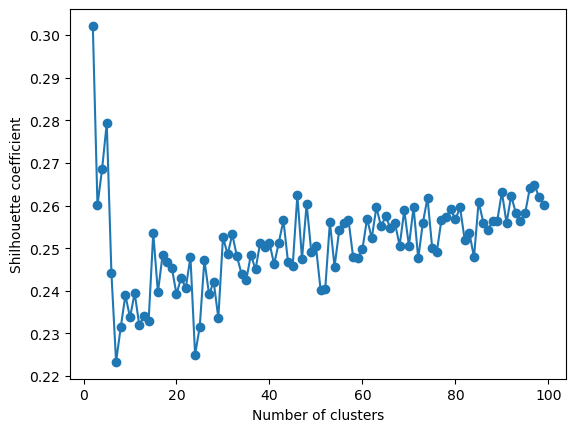

In [203]:
silhouette = []

for i in range(2,100):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(data_reduced) # 모형 훈련
    silhouette_values = silhouette_score(data_reduced, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,100), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


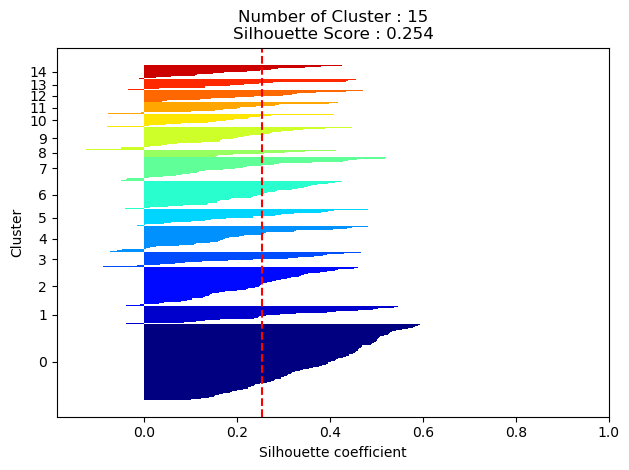

In [206]:
silhouetteViz(15, data_reduced)

In [240]:
kmeans = KMeans(n_clusters=15, random_state=42)
res3 = pd.DataFrame(data_reduced)
model = kmeans.fit_predict(data_reduced)
res3["Cluster"] = model
res3

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



,0,1,2,Cluster
0,3.629285,-0.968466,-1.007634,14
1,-1.964969,-2.332388,-0.751857,11
2,6.521144,0.458773,6.822259,4
3,1.948939,-0.264014,-1.357726,14
4,-5.825717,-3.120130,0.207159,1
...,...,...,...,...
622,-0.914595,0.281211,-0.302276,10
623,-2.494251,-4.285493,1.032570,11
624,-1.834915,-1.346639,1.355376,10
625,-0.239662,-2.178099,0.233511,10


In [241]:
res4 = res3.copy()
res4.index = word_transpose.index
res4

,0,1,2,Cluster
소외,3.629285,-0.968466,-1.007634,14
다이어트,-1.964969,-2.332388,-0.751857,11
실패,6.521144,0.458773,6.822259,4
긍정,1.948939,-0.264014,-1.357726,14
피자,-5.825717,-3.120130,0.207159,1
...,...,...,...,...
불운,-0.914595,0.281211,-0.302276,10
택시,-2.494251,-4.285493,1.032570,11
악수,-1.834915,-1.346639,1.355376,10
단합,-0.239662,-2.178099,0.233511,10


In [242]:
res4[res4['Cluster'] == 12]

,0,1,2,Cluster
인정,11.538725,-1.570277,3.942962,12
취소,7.041017,-4.726612,5.449764,12
해명,5.361981,1.617293,1.877973,12
제재,7.085850,-1.892341,-0.654170,12
경고,4.772884,0.801535,2.827355,12
무시,6.133342,1.837870,2.573117,12
확인,7.319169,-3.747478,2.773992,12
부정,8.417688,0.495355,1.601508,12
처벌,11.599533,2.657841,3.275406,12
지시,6.027704,-0.996036,4.603377,12


In [244]:
print(res3)

            0         1         2  Cluster
0    3.629285 -0.968466 -1.007634       14
1   -1.964969 -2.332388 -0.751857       11
2    6.521144  0.458773  6.822259        4
3    1.948939 -0.264014 -1.357726       14
4   -5.825717 -3.120130  0.207159        1
..        ...       ...       ...      ...
622 -0.914595  0.281211 -0.302276       10
623 -2.494251 -4.285493  1.032570       11
624 -1.834915 -1.346639  1.355376       10
625 -0.239662 -2.178099  0.233511       10
626 -2.616299 -0.357332  0.347283       10

[627 rows x 4 columns]


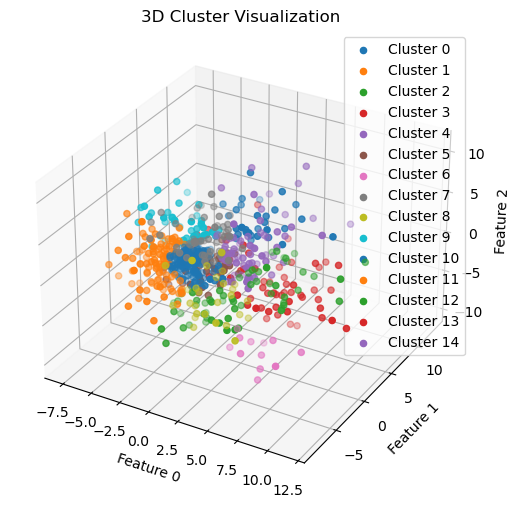

In [245]:

df = res3

# Visualize the 3D clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(df['Cluster'].nunique()):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=f'Cluster {cluster}')

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.show()

In [246]:
!pip install plotly

In [248]:
import plotly.graph_objects as go

# Assuming your DataFrame is named 'res3'

# Create a 3D scatter plot using Plotly
fig = go.Figure()

for cluster in range(res3['Cluster'].nunique()):
    cluster_data = res3[res3['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data[0],
        y=cluster_data[1],
        z=cluster_data[2],
        mode='markers',
        marker=dict(size=5, color=cluster, opacity=0.7),
        name=f'Cluster {cluster}'
    ))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 0',
        yaxis_title='Feature 1',
        zaxis_title='Feature 2',
        aspectmode='cube'
    ),
    title='Interactive 3D Cluster Visualization',
    width=800,  # Adjust the width as needed
    height=600  # Adjust the height as needed
)

# Show the interactive plot in the Jupyter Notebook
fig.show()

In [220]:
# 군집 수에 따른 군집 데이터 분포의 시각화 함수 정의
from matplotlib import cm
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [221]:
clusterScatter(15, res3)


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


InvalidIndexError: (array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False,  True, False, False,  True, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True]), 0)

### PCA - KMEANS

### PCA - MEANSHIFT
